**Proyecto popularidad temas musicales**

**Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

**Cargar el dataset**

In [2]:
dfa = pd.read_csv('data.csv')
dfa.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


**Verificación y limpieza de datos**


In [3]:
dfa.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Se elimina la columna track_id por que no aporta ningún valor 

In [4]:
df = dfa.drop(columns=['track_id'])
df

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",21,0.98600,0.3130,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,18,0.97200,0.3600,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",10,0.93500,0.1680,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",17,0.96100,0.2500,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",19,0.98500,0.1420,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228154,Soundtrack,Max Richter,Infra 3,32,0.98800,0.4650,181613,0.09780,0.915000,F#,0.5340,-16.180,Minor,0.0296,75.173,4/4,0.1450
228155,Soundtrack,Michael Giacchino,Rebellions Are Built on Hope,36,0.85500,0.0610,176067,0.02550,0.899000,A,0.0919,-22.064,Major,0.0393,57.042,4/4,0.0321
228156,Soundtrack,Trevor Jones,Last Of The Mohicans,30,0.00169,0.0631,326043,0.50600,0.172000,C,0.0961,-9.898,Minor,0.0357,68.014,4/4,0.0434
228157,Soundtrack,Randy Edelman,Battle Of Little Round Top,31,0.73400,0.1760,237893,0.21500,0.860000,E,0.0921,-15.586,Minor,0.0361,113.024,5/4,0.0358


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

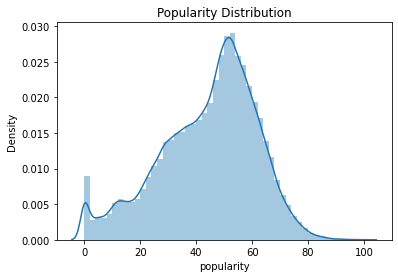

In [5]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

Se definine la popularidad como una variable binaria. En este caso por encima de 57 como "popular" ya que ese es el límite del 25 % de las mejores canciones y será 1, y por debajo de 57 como "no popular" y con 0.

In [6]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
242,Alternative,Joji,SLOW DANCING IN THE DARK,1,0.54400,0.5150,209274,0.4790,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.2840
243,Alternative,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),1,0.01160,0.4640,239507,0.8520,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.2330
244,Alternative,H.E.R.,Best Part (feat. Daniel Caesar),1,0.79500,0.4730,209400,0.3710,0.000000,E,0.1090,-10.219,Minor,0.0405,75.208,4/4,0.4130
245,Alternative,Joji,YEAH RIGHT,1,0.61900,0.6720,174358,0.5880,0.241000,C#,0.0992,-9.573,Major,0.1330,169.033,4/4,0.2040
246,Alternative,H.E.R.,Could've Been (feat. Bryson Tiller),1,0.64000,0.5450,248467,0.3300,0.000007,C#,0.2200,-11.719,Minor,0.1640,103.553,4/4,0.3990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221649,World,Kemuel,Oh Quão Lindo Esse Nome É (What a Beautiful Na...,1,0.00697,0.4100,314290,0.5790,0.000000,D,0.0948,-7.116,Major,0.0469,135.979,4/4,0.1440
224289,Opera,Charles Gounod,Ave Maria,1,0.99300,0.1320,163267,0.0195,0.888000,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400
224290,Opera,Richard Wagner,Tannhäuser: Overture,1,0.83100,0.0843,853827,0.1820,0.926000,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604
224291,Opera,Giacomo Puccini,"""Nessun dorma!""",1,0.96100,0.1710,180933,0.3080,0.005460,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889


# One-Hot Encode

In [7]:
#Se Verifica cuántas columnas más crearemos por OHE the cat_cols.
df.nunique()

genre                   26
artist_name          13318
track_name          130254
popularity               2
acousticness          4591
danceability          1292
duration_ms          66003
energy                2509
instrumentalness      5397
key                     12
liveness              1719
loudness             27339
mode                     2
speechiness           1637
tempo                72616
time_signature           5
valence               1687
dtype: int64

In [8]:
#Se verifica las variables a categorizar
cat_cols = ['genre','key', 'mode', 'time_signature']

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
data_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(data_ohe, columns=encoder.get_feature_names(cat_cols), index=df.index)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
pd.set_option("display.max_columns", None)
df_ohe

,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
228156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#Se concatena las columnas con el dataframe incial
df_ohe = pd.concat([df.drop(cat_cols, axis=1), df_ohe], axis=1)
df_ohe.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",0,0.986,0.313,490867,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,0,0.972,0.360,176797,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",0,0.935,0.168,266184,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",0,0.961,0.250,288573,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",0,0.985,0.142,629760,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
#Se genera el archivo con los datos procesados
df_ohe.to_csv('data-Clean2.csv', index=False)

In [13]:
df_ohe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,0.250851,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795,0.000522,0.040993,0.040993,0.040993,0.040993,0.040568,0.042431,0.037974,0.038136,0.041099,0.040757,0.040739,0.041826,0.041379,0.034213,0.036290,0.041138,0.039411,0.040463,0.038442,0.039126,0.040638,0.038894,0.039836,0.042278,0.039867,0.096095,0.066945,0.078511,0.116314,0.103292,0.101666,0.032328,0.074694,0.084950,0.068273,0.110432,0.066502,0.644827,0.355173,0.000035,0.010786,0.098493,0.868219,0.022467
std,0.433504,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397,0.022832,0.198275,0.198275,0.198275,0.198275,0.197288,0.201571,0.191133,0.191524,0.198519,0.197726,0.197686,0.200192,0.199166,0.181776,0.187012,0.198610,0.194571,0.197043,0.192262,0.193896,0.197451,0.193343,0.195575,0.201222,0.195647,0.294722,0.249926,0.268975,0.320601,0.304341,0.302209,0.176871,0.262897,0.278807,0.252214,0.313428,0.249158,0.478567,0.478567,0.005921,0.103296,0.297980,0.338253,0.148196
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000

**Hallar X, Y**

In [14]:
#Se encuentra las varaibles X,y
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
                'liveness', 'loudness', 'speechiness', 'tempo','valence', 'key_A',
                'genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues', 'genre_Children’s Music',
                'genre_Classical', 'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
                'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B',
                'genre_Rap', 'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul', 'genre_Soundtrack',
                'genre_World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
                'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'time_signature_0/4', 'time_signature_1/4',
                'time_signature_3/4', 'time_signature_4/4', 'time_signature_5/4']


In [15]:
X = df_ohe[features] # features
y = df_ohe.popularity # target

**Dividir el dataset en training and testing**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
208174,0.854000,0.420,130880,0.321,0.847000,0.1860,-14.272,0.0320,112.780,0.139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
153409,0.016500,0.570,181293,0.784,0.000000,0.1130,-8.113,0.0429,114.362,0.246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
178455,0.184000,0.682,159101,0.858,0.892000,0.0799,-8.565,0.0411,89.019,0.322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
66819,0.588000,0.628,256973,0.351,0.003750,0.1040,-10.684,0.0304,78.982,0.560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
55044,0.571000,0.866,205091,0.388,0.000000,0.1000,-11.009,0.3200,109.976,0.556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109259,0.002600,0.824,426853,0.656,0.002510,0.1440,-6.571,0.2240,125.006,0.707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50057,0.000154,0.617,260183,0.644,0.572000,0.3110,-5.560,0.0404,142.052,0.689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5192,0.306000,0.509,240600,0.538,0.000005,0.0910,-6.835,0.0379,170.111,0.284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
208780,0.835000,0.686,70587,0.316,0.000626,0.1050,-12.027,0.0403,79.801,0.478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Normalización media con Scikit-learn**

In [17]:
# configurar el StandardScaler para que elimine la media
# pero que no divida por la desviación estándar
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# configurar el robustscaler para que NO elimine la mediana
# sino que normalice por max()-min(), es importante para esto configurar el
# rango de cuantiles a 0 y 100, que representan los valores mínimo y máximo
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# ajustar los escaladores al conjunto de train, aprenderá los parámetros
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

C:\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [18]:
# transformemos los arrays NumPy devueltos en dataframes para el resto de la demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
#Descripción de los datos antes de la Normalización 
np.round(X_train.describe(), 1)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0
mean,0.4,0.6,236533.3,0.6,0.1,0.2,-9.4,0.1,117.4,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.6,0.4,0.0,0.0,0.1,0.9,0.0
std,0.4,0.2,118619.6,0.3,0.3,0.2,6.0,0.2,30.7,0.3,0.3,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.2,0.5,0.5,0.0,0.1,0.3,0.3,0.1
min,0.0,0.1,15509.0,0.0,0.0,0.0,-52.5,0.0,30.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.4,186147.0,0.4,0.0,0.1,-11.3,0.0,92.7,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.2,0.6,221080.0,0.6,0.0,0.1,-7.5,0.1,115.2,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.7,0.7,264707.0,0.8,0.0,0.3,-5.4,0.1,138.9,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
max,1.0,1.0,5552917.0,1.0,1.0,1.0,1.3,1.0,239.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
#Descripción de los datos despues de la Normalización
np.round(X_train_scaled.describe(), 1)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0,159711.0
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,0.4,0.2,0.0,0.3,0.3,0.2,0.1,0.2,0.1,0.3,0.3,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.2,0.5,0.5,0.0,0.1,0.3,0.3,0.1
min,-0.4,-0.5,-0.0,-0.6,-0.1,-0.2,-0.8,-0.1,-0.4,-0.4,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.6,-0.4,-0.0,-0.0,-0.1,-0.9,-0.0
25%,-0.3,-0.1,-0.0,-0.2,-0.1,-0.1,-0.0,-0.1,-0.1,-0.2,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.6,-0.4,-0.0,-0.0,-0.1,0.1,-0.0
50%,-0.1,0.0,-0.0,0.0,-0.1,-0.1,0.0,-0.1,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.4,-0.4,-0.0,-0.0,-0.1,0.1,-0.0
75%,0.3,0.1,0.0,0.2,-0.1,0.0,0.1,-0.0,0.1,0.2,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.4,0.6,-0.0,-0.0,-0.1,0.1,-0.0
max,0.6,0.5,1.0,0.4,0.9,0.8,0.2,0.9,0.6,0.6,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.4,0.6,1.0,1.0,0.9,0.1,1.0


# Selección de Caracteristicas y Modelo Ramdon Forest

In [21]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.798336
Test Accuracy,0.794662
Top 1 Feature Predictor,genre_Pop
Top 2 Feature Predictor,genre_Rap
Top 3 Feature Predictor,genre_Rock
Top 4 Feature Predictor,loudness
Top 5 Feature Predictor,instrumentalness


# Interpretación

Se realizó el método de OneHotEncode a las variables categóricas formando 55 columnas en el dataframe procesado. Con ello se realizó la normalización de los mismos y seleccionar las características con Random Forest. Se vizualiza el top 5 de características con mayor poder predictivo en este caso, el género pop, género rap, género rock, loudness e instrumentalness  

### Qué modelo de ML/DL/DM usted aplicará a su proyecto para ser resuelto?

Para la realización del proyecto que se basa en la predicción de popularidad de temas musicales, se realizará el algoritmo de Random Forest.  

### Con qué modelos comparará ese modelo y por qué?

Para la comparación del modelo implementado se utilizará los algorimos de SMV y Regresion Logistica. Por que son unos de los algoritmos que se usan en problemas de predicción. Con el algoritmo de SVM permite la utilización de kernels que permitirán obtnener mejores resultados.

### Cuáles son los hyperparameters que utilizará para cada modelo? Interprete los resultados. 

**Ramdon Forest**
#Grid de parámetros
param_grid = {'n_estimators': [int =(100)], 
               'max_features': ['auto', 'sqrt'], 
               'max depth': [int(x) for x in np.linspace(10, 110, num = 11)], 
               'min_samples_split': [2, 5,10], 
               'min_samples_leaf':[1, 2, 4], 
               'bootstrap': [True, False]}
              
              
Se determina el número de árboles que por defecto son 100, el valor de características aleatorias para muestrear, max_ depth, que determina la profundidad correspondiente del arbol. Tambien "min_samples_split" que corresponde al valor mínimo para las muestras y dividir el nodo interno. Así mismo se presenta "min_samples_leaf" que en cambio es valor mínimo para las muestras de los nodos hojas correspondiente. 

**Svm**

#Grid de parámetros
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 

grid.fit(X_train, y_train)

"C:float" que determina la fuerza de regualrización del páramentro. "gamma: {‘scale’, ‘auto’}" que determina el coeficiente correspondiente para el kernel, en el caso de que el valor predeterminado se pase usa 1 / (n_features * X.var()). Y la elección del Kernel que puede ser RBF, Linear, sigmoid.

**Regresion Logistica**
lr2 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=0.8, solver='lbfgs', max_iter=75,
                       warm_start=True)
lr2.fit(X_train, y_train)

fit_intercep,Especifica si se debe agregar una constante a la función de decisión. penalty precisar la norma, agregue un término de penalización L2 y es la opción predeterminada. tol Tolerancia para los criterios de parada. solver, el valor predeterminado es 'lbfgs'. Para elegir un solucionador. max_iter, Número máximo de iteraciones necesarias para que los solucionadores converjan.

### Qué métricas utilizará para evaluar su modelo? Comente sobre cada métrica y qué valor espera.

Se utilizará las métricas de Accuracy, se espera obtener un porcentaje mayor del 70% .Y la métrica  “score”, devuelve el coeficiente de determinación de la predicción.